# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

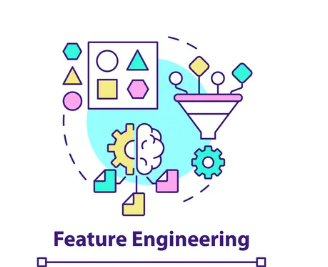

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('loan_train.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
catgorical_data = data.select_dtypes(include = ['object'])
catgorical_data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 8 columns]

In [8]:
catgorical_data.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
impute_data = impute.fit_transform(catgorical_data)
impute_data

array([['LP001002', 'Male', 'No', ..., 'No', 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 'No', 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 'No', 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 'No', 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 'Yes', 'Semiurban', 'N']],
      dtype=object)

In [21]:
impute_dataframe = pd.DataFrame(impute_data,columns = catgorical_data.columns) 
impute_dataframe.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(new_cdf[['Gender','Married','Self_Employed']]).toarray()
result









In [25]:
from sklearn.preprocessing import OneHotEncoder
onec = OneHotEncoder()
result = onec.fit_transform(impute_dataframe[['Gender','Married']]).toarray()
result

array([[0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

In [30]:
result_data = pd.DataFrame(data=result)
result_data.head()

0    1    2    3
0  0.0  1.0  1.0  0.0
1  0.0  1.0  0.0  1.0
2  0.0  1.0  0.0  1.0
3  0.0  1.0  0.0  1.0
4  0.0  1.0  1.0  0.0

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder()
new_data = ordi.fit_transform(impute_dataframe[['Loan_ID','Dependents']])
new_data

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   0.],
       ...,
       [611.,   1.],
       [612.,   2.],
       [613.,   0.]])

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(impute_dataframe.Loan_Status)
target


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,